In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [22]:
#! pip install opencv-python

In [23]:
import cv2

cv2.__version__

'4.10.0'

In [24]:
model = tf_keras.models.load_model(r"C:\Work\2024\minion\Workspace\CNN_Basic\mnist_cnn_model.keras")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,264,928 (4.83 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 843,286 (3.22 MB)

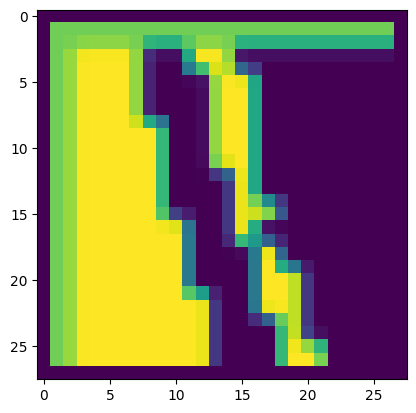

In [42]:
cap = cv2.VideoCapture(0)

if cap.isOpened():
    #print("Camera is opened")
    while True:
        ret, img = cap.read()
        if ret:
            GRAY_IMAGE = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            THRESHOLD, BIN_IMAGE = cv2.threshold(GRAY_IMAGE, 110, 255, cv2.THRESH_BINARY_INV) # 이미지이진화(흑백대비)
            CONTOURS, HIERACHY = cv2.findContours(BIN_IMAGE, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # 경계선 찾기
            for CONTOUR in CONTOURS:
                (x, y), radious = cv2.minEnclosingCircle(CONTOUR) #경계영역을 포함하는 가장 작은 원 찾기
                if radious > 3 :
                    #원으로 부터 사각형 정보를 도출
                    xs, xe = int(x - radious), int(x + radious)
                    ys, ye = int(y - radious), int(y + radious)
                    cv2.rectangle(BIN_IMAGE, (xs, ys), (xe, ye), (200, 0, 0), 1) #이미지에 사각형 그리기

                    roi = BIN_IMAGE[ys:ye, xs:xe]
                    if roi.shape[0] == 0 or roi.shape[1] == 0:
                        continue

                    dst1 = cv2.resize( roi, dsize=( 50, 50 ), interpolation = cv2.INTER_AREA )
                    dst2 = cv2.resize( dst1, dsize=( 26, 26 ), interpolation = cv2.INTER_AREA )
                    input = np.zeros((28,28)) # 모델에 입력할 이미지
                    input[1:-1, 1:-1] = dst2[:,:]
                    input = input.reshape((-1, 28, 28, 1))

                    plt.imshow(input.reshape(28,28,1))

                    output = model.predict(input, verbose=0) # 예측모델에 이미지를 넣어서 결과값을 저장
                    digit = output.argmax()
                    cv2.putText(BIN_IMAGE, str(digit), (xs, ys), cv2.FONT_ITALIC, 2, (200,0,0))

                                
            #cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #오브젝트 디텍션 단계에서는 흑백처리가 좋다.
            cv2.imshow("Image", BIN_IMAGE) # 이미지라는 이르의 창을 생성하고 창에 이미지를 표시
            if cv2.waitKey(1)&0xFF == 27: # ESC키가 눌린 경우
                break
else:
    print("fail to open camera")

cap.release()
cv2.destroyAllWindows()

In [31]:
cap.release()
cv2.destroyAllWindows()